<a href="https://colab.research.google.com/github/m-bashari-m/vehicle-color-recognition/blob/main/src/11_combined_model_v2_analyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/m-bashari-m/vehicle-color-recognition/main/src/utils.py

--2022-06-19 20:24:57--  https://raw.githubusercontent.com/m-bashari-m/vehicle-color-recognition/main/src/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12074 (12K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]  11.79K  --.-KB/s    in 0s      

2022-06-19 20:24:57 (99.2 MB/s) - ‘utils.py’ saved [12074/12074]



In [2]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


In [3]:
import pandas as pd
import numpy as np
import os

import tensorflow as tf
from tensorflow import keras

!pip install -q tensorflow-io
import tensorflow_io as tfio

from utils import get_train_val_ds, ErrorAnalyzer, get_class_weight, get_model

     |████████████████████████████████| 25.9 MB 1.9 MB/s 


In [4]:
BATCH_SIZE = 64
IMG_SIZE = (256, 256)
AUTOTUNE = tf.data.AUTOTUNE
N_CLASSES = 16

In [5]:
dataset_dir = os.path.join('drive', 'MyDrive', 'cars')
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')

In [6]:
_, val_ds = get_train_val_ds(train_dir, val_dir, batch_size=BATCH_SIZE, img_size=IMG_SIZE)

Found 17043 files belonging to 16 classes.
Found 3495 files belonging to 16 classes.


In [7]:
classes, _ = get_class_weight()

In [8]:
file_paths = val_ds.file_paths

In [9]:
rgb_ds = (
    val_ds.
    map(lambda img, lbl: (img/255., lbl), num_parallel_calls=AUTOTUNE).
    prefetch(AUTOTUNE))

## Epoch 10

In [12]:
combined_10 = get_model('untrainable/combined-model-10.2.h5')

In [13]:
analyzer_10 = ErrorAnalyzer(model=combined_10,
                         ds=rgb_ds,
                         file_paths=file_paths,
                         classes=classes,
                         model_name='combined-10.2')

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


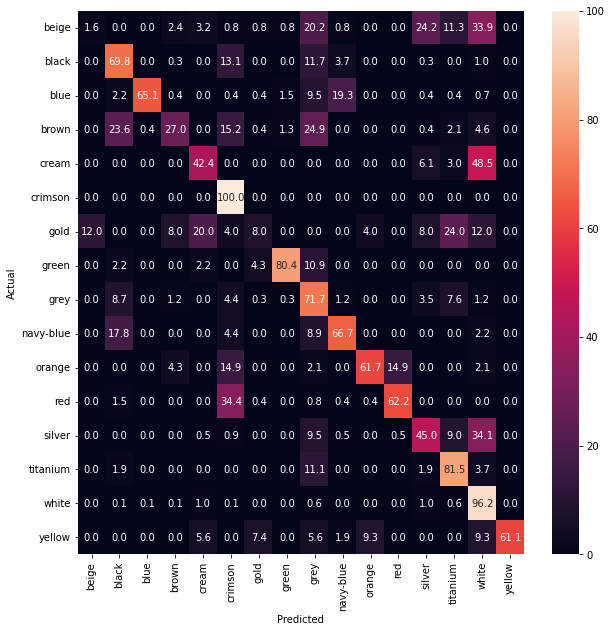

In [14]:
analyzer_10.plot_confusion_mat()
analyzer_10.evaluate_model()

## Epoch 15

Calculateing error types...
Writing in log file...
All done. Check log file => combined-10.2.csv
Accuracy: %72.5
Precision mean: 0.6029
Recall mean: 0.5878
Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


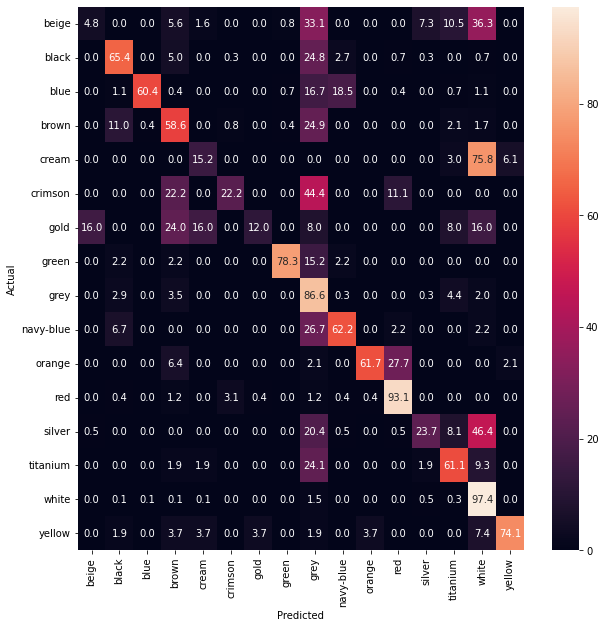

Calculateing error types...
Writing in log file...
All done. Check log file => combined-15.2.csv
Accuracy: %76.31
Precision mean: 0.6532
Recall mean: 0.548


In [15]:
combined_15 = get_model('untrainable/combined-model-15.2.h5')

analyzer_15 = ErrorAnalyzer(model=combined_15,
                         ds=rgb_ds,
                         file_paths=file_paths,
                         classes=classes,
                         model_name='combined-15.2')

analyzer_15.plot_confusion_mat()
analyzer_15.evaluate_model()

## Epoch 20

Making confusion matrix:


  0%|          | 0/55 [00:00<?, ?it/s]

Confusion matrix is saved


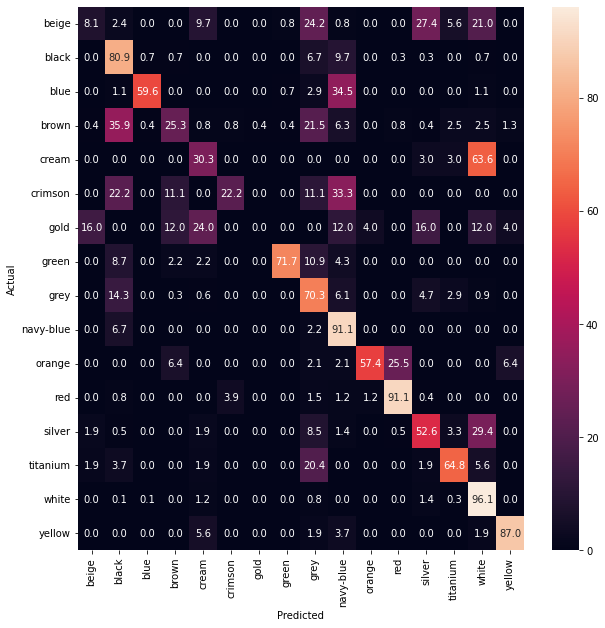

Calculateing error types...
Writing in log file...
All done. Check log file => combined-20.2.csv
Accuracy: %75.44999999999999
Precision mean: 0.5994
Recall mean: 0.5678


In [16]:
combined_20 = get_model('untrainable/combined-model-20.2.h5')

analyzer_20 = ErrorAnalyzer(model=combined_20,
                         ds=rgb_ds,
                         file_paths=file_paths,
                         classes=classes,
                         model_name='combined-20.2')

analyzer_20.plot_confusion_mat()
analyzer_20.evaluate_model()

## Epoch 25

## Epoch 30